In [2]:
import json
from module.orders import Order
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

with open("example_data/orders_history.json","r") as f:
    orders_history = json.load(f)["orders"]

orders_prepared = []
for order in orders_history:
    orders_prepared.append(Order(order['items'], order['date']))

In [4]:
order_data_structure = []
for order in orders_prepared:
    order_id = order.order_id
    order_accepted = order.order_accepted
    order_refused_reason = order.order_refused_reason
    date = order.date
    if order_accepted == True:
        calories = order.calories
    else:
        calories = 0
    if order_accepted == True:
        price = order.price
    else:
        price = 0
    order_data_structure.append([order_id, order_accepted, order_refused_reason, date, calories, price])

# Create a Pandas DataFrame from the collected data
df = pd.DataFrame(order_data_structure, columns=['order_id', 'order_accepted', 'order_refused_reason', 'date', 'calories', 'price'])
print(df)

          order_id  order_accepted                    order_refused_reason  \
0          order-1            True                                    None   
1          order-2            True                                    None   
2          order-3           False  Meal is too big! 2170 is way too much!   
3          order-4            True                                    None   
4          order-5            True                                    None   
...            ...             ...                                     ...   
36914  order-36915            True                                    None   
36915  order-36916            True                                    None   
36916  order-36917            True                                    None   
36917  order-36918            True                                    None   
36918  order-36919           False  Meal is too big! 2120 is way too much!   

            date  calories  price  
0     2022-01-01       995 

In [ ]:
df.head()

In [ ]:
#show the data structure
df.shape

In [ ]:
#describe the distribution of calories
df['calories'].describe()

In [ ]:
#describe the distribution of price
df['price'].describe()

In [ ]:
#calculate order accepted rate
df['order_accepted'].value_counts(True)

In [ ]:
calories_per_day = df.groupby('date', as_index=False)['calories'].sum()
plot = calories_per_day.plot(
    x = 'date',
    y = 'calories',
    kind = 'bar',
    figsize = (7,4),
    title = 'Calories per day',
)

In [ ]:
calories_per_day = df.groupby(df.date.dt.month)['calories'].sum()
plt.plot = calories_per_day.plot(
    x = 'date',
    y = 'calories',
    kind = 'bar',
    figsize = (7,3),
    title = 'Calories per month',
)

In [ ]:
earnings_per_day = df.groupby('date', as_index=False)['price'].sum()
plot = earnings_per_day.plot(
    x = 'date',
    y = 'price',
    kind = 'bar',
    figsize = (7,3),
    title = 'Earnings per day',
)



In [ ]:
earnings_per_day = df.groupby(df.date.dt.month)['price'].sum()
plot = earnings_per_day.plot(
    x = 'month',
    y = 'price',
    kind = 'bar',
    figsize = (7,3),
    title = 'Earnings per month',
)

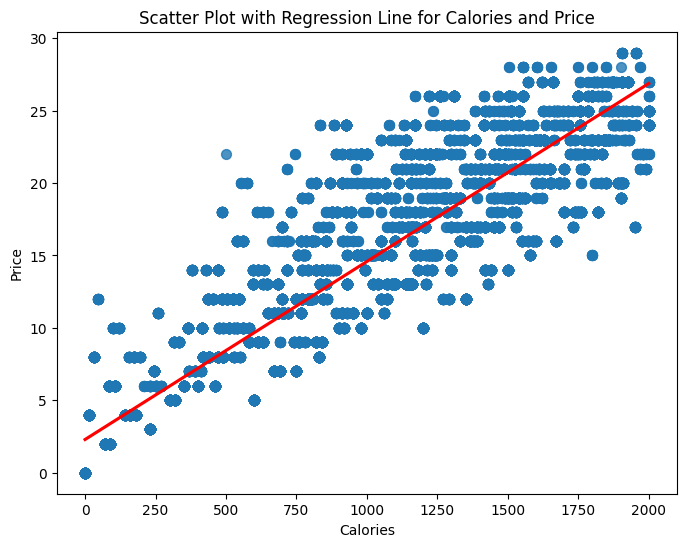

In [5]:
# Create a scatter plot for price and calories with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='calories', y='price', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Calories')
plt.ylabel('Price')
plt.title('Scatter Plot with Regression Line for Calories and Price')

# Show the plot
plt.show()